/tmp/ipykernel_19162/2958085975.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='application', x=metric, palette="Set2", orient='h')


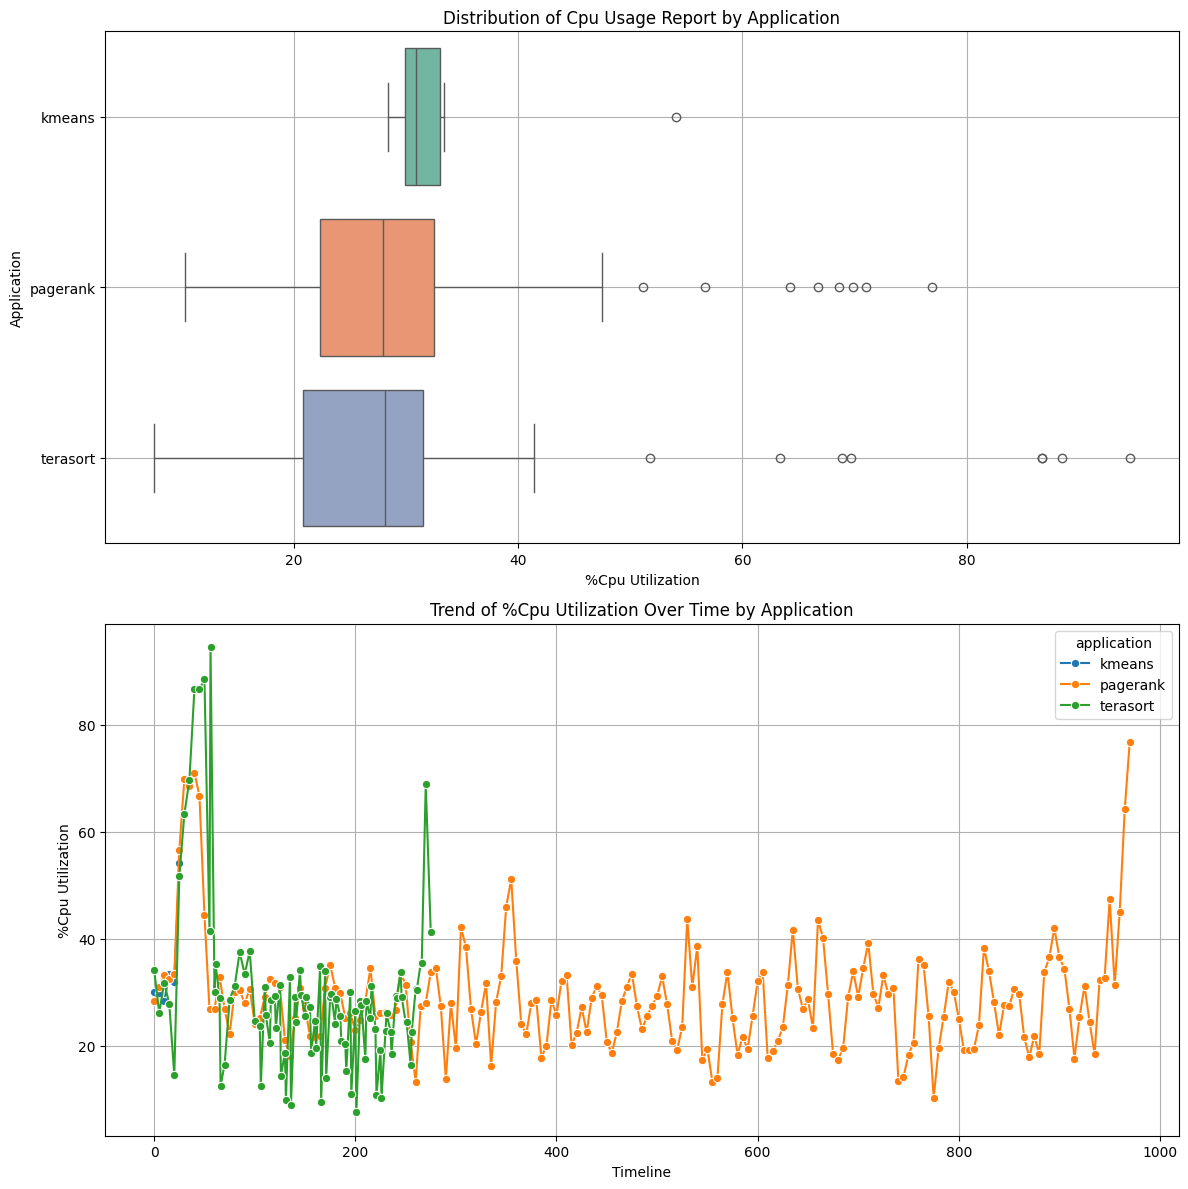

/tmp/ipykernel_19162/2958085975.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='application', x=metric, palette="Set2", orient='h')


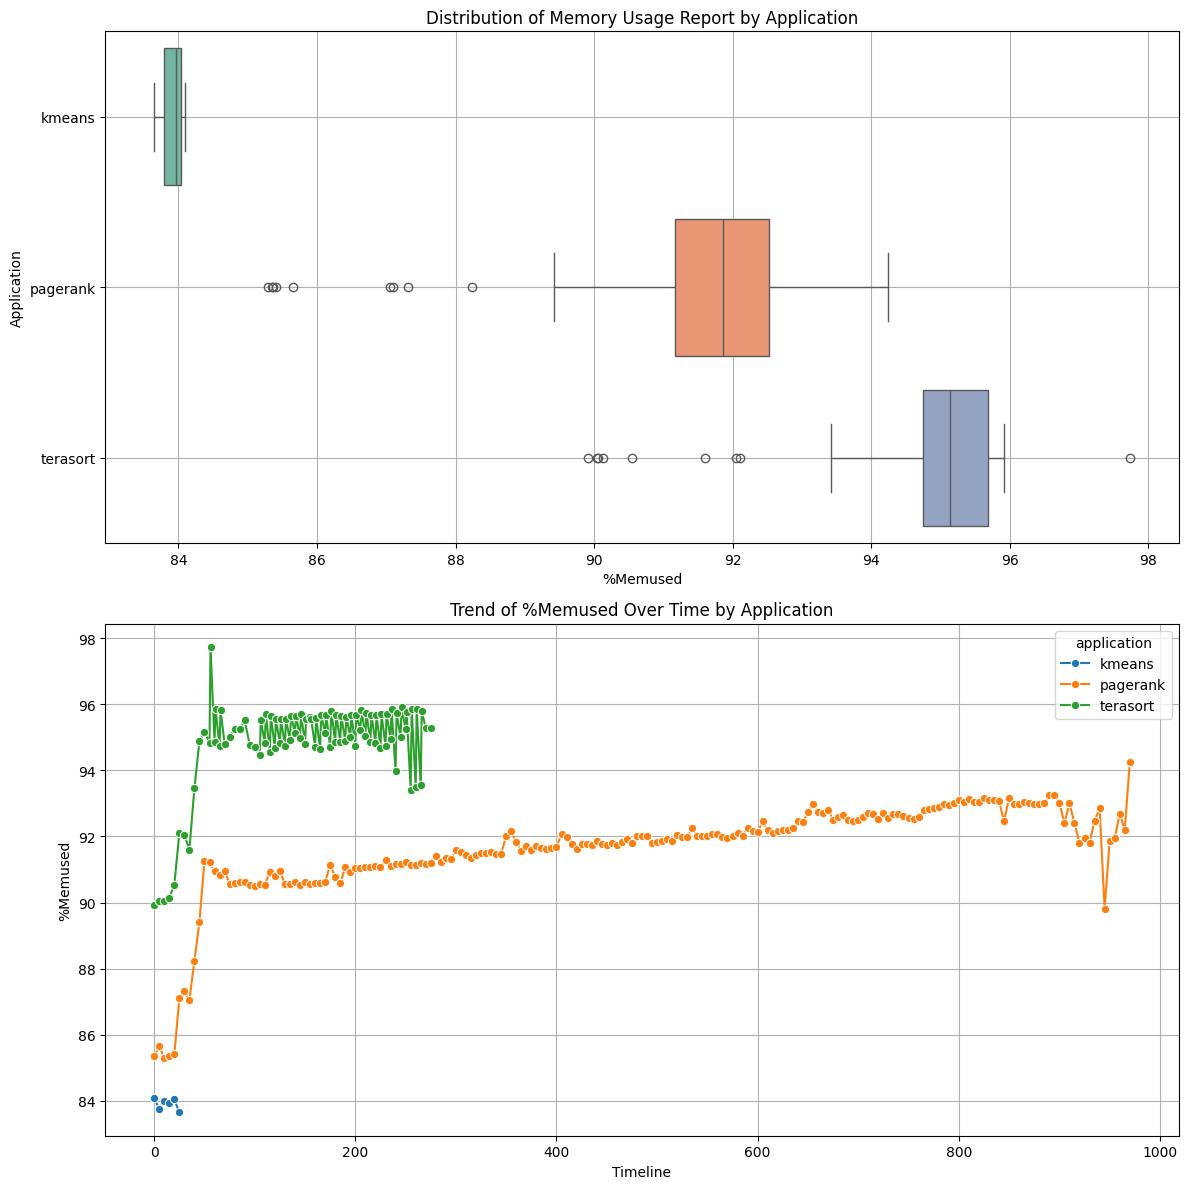

/tmp/ipykernel_19162/2958085975.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='application', x=m, palette="Set2", orient='h')


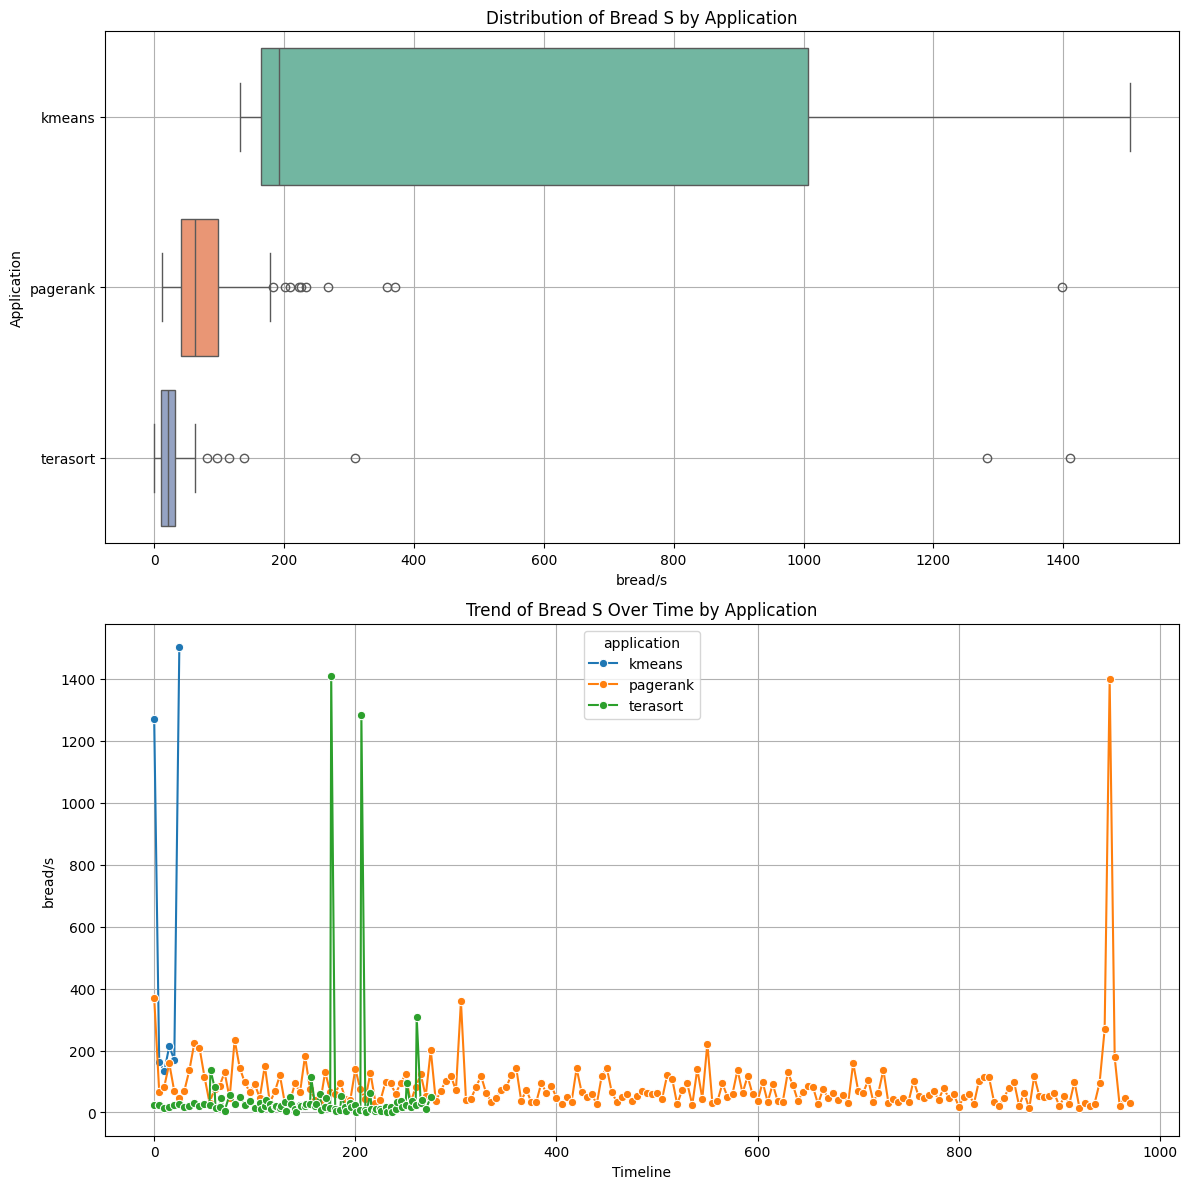

/tmp/ipykernel_19162/2958085975.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='application', x=m, palette="Set2", orient='h')


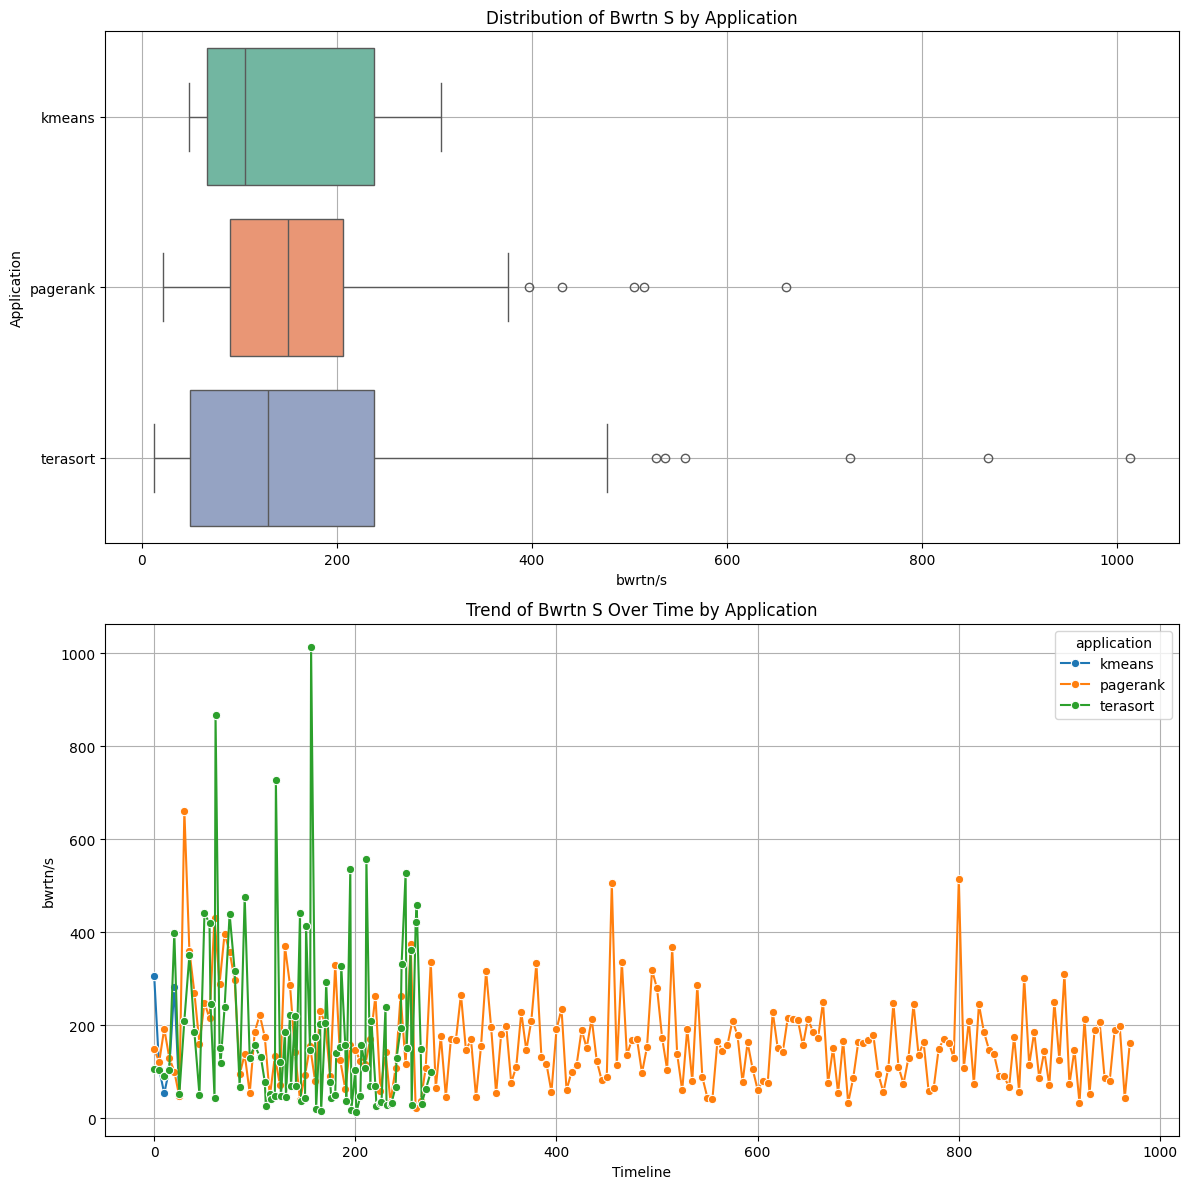

/tmp/ipykernel_19162/2958085975.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='application', x=m, palette="Set2", orient='h')


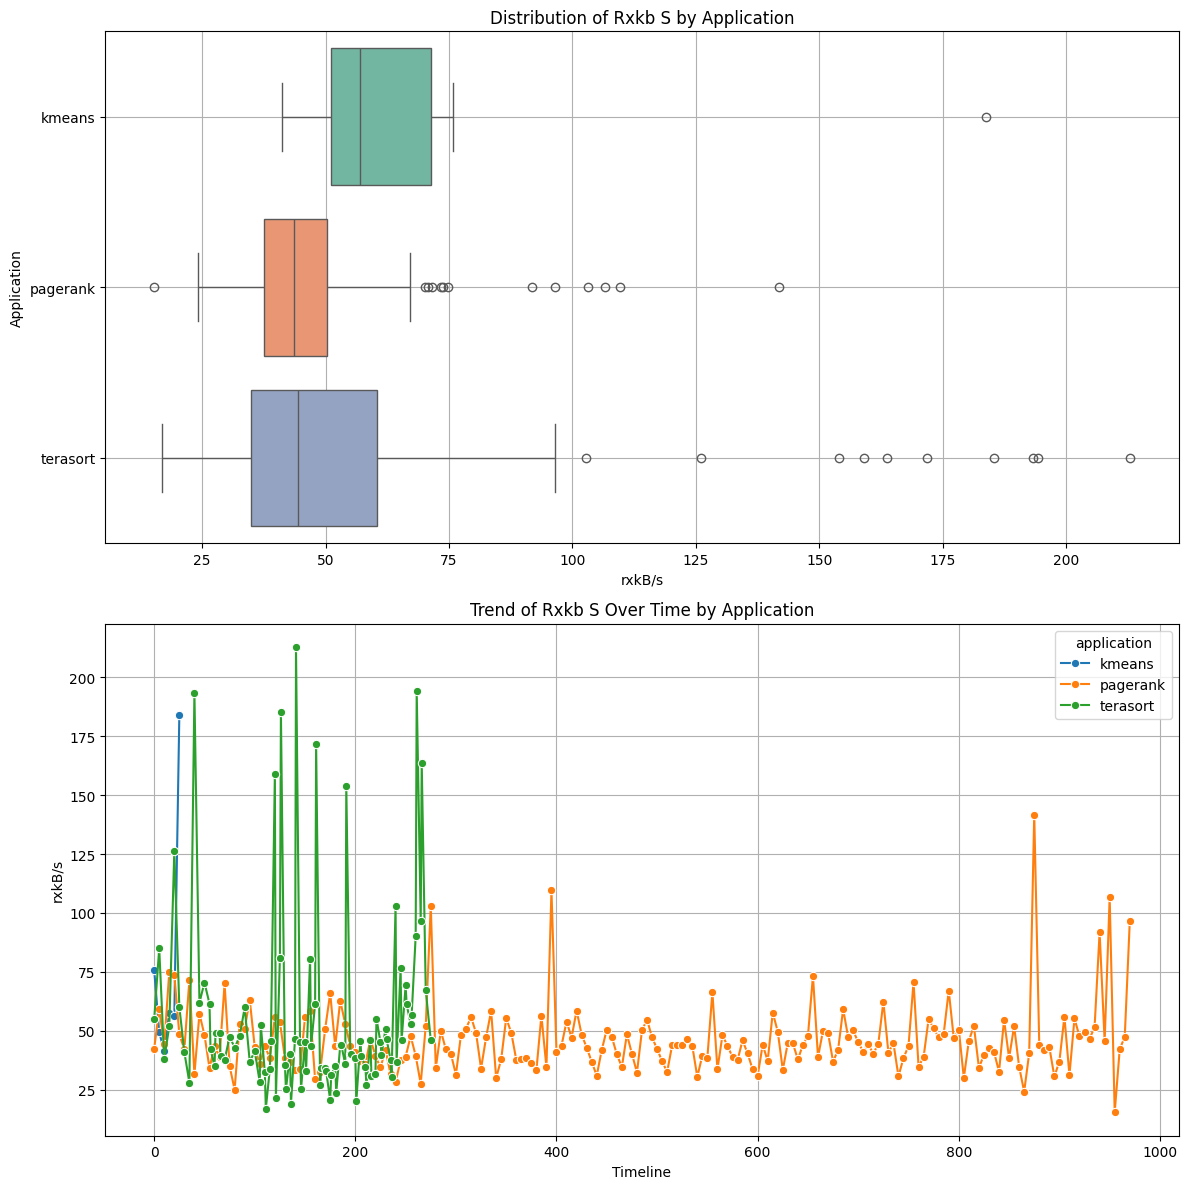

/tmp/ipykernel_19162/2958085975.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='application', x=m, palette="Set2", orient='h')


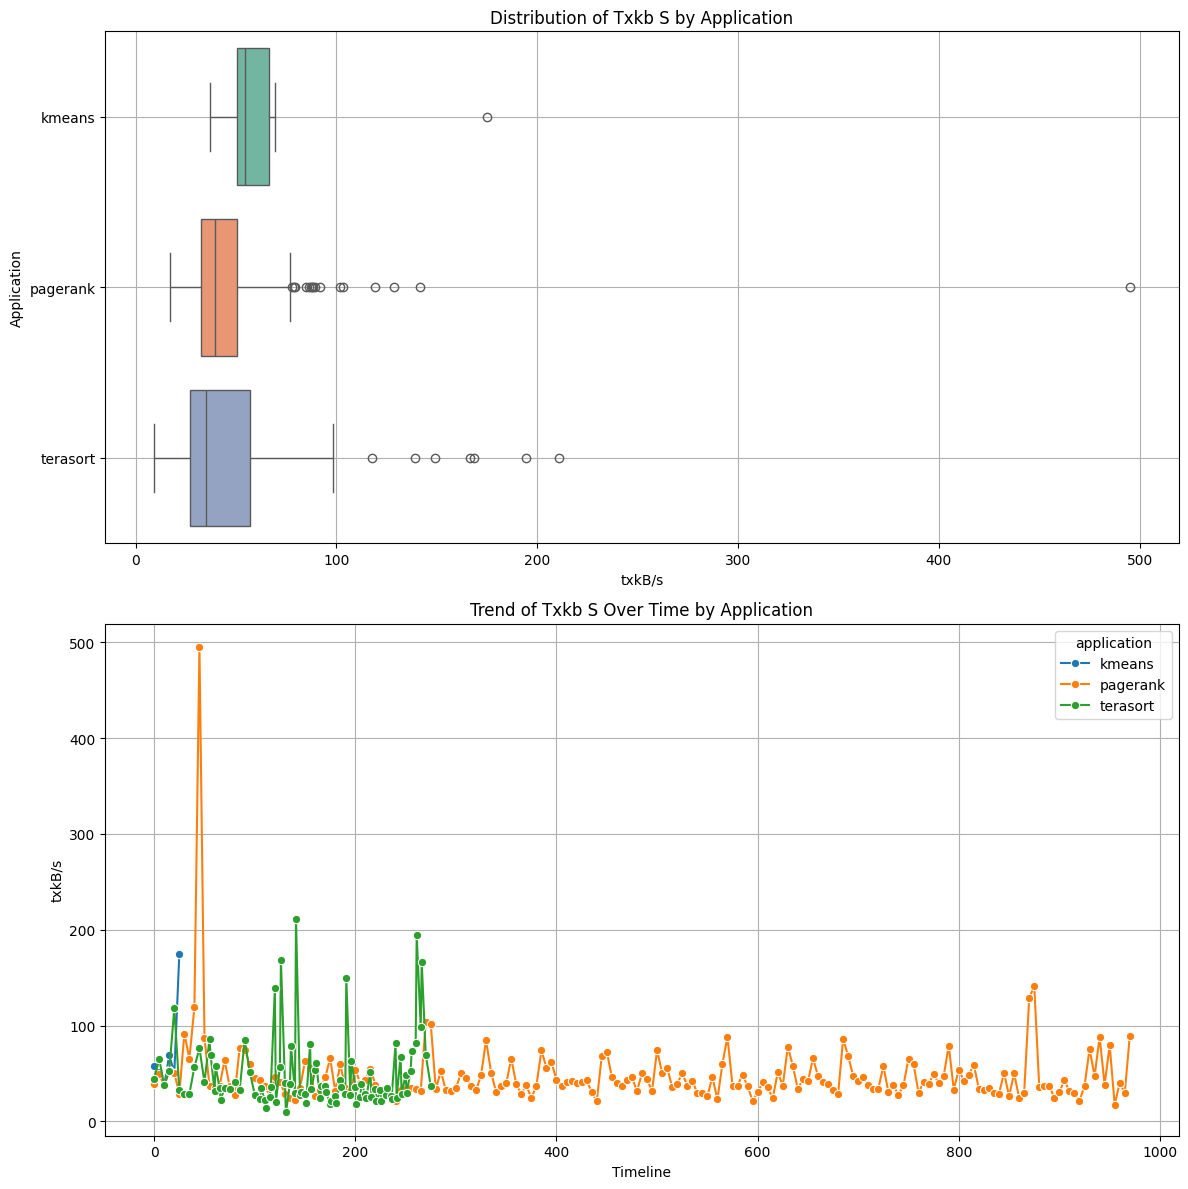

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# 
# terrasort <- cpu
# dfsio <- memory, I/0
# pagerank <- network

# List of applications you want to plot (if you want to filter)
applications_to_plot = [
    'terasort',
    'dfsioe',
    'pagerank', 
    'kmeans'
]  # Empty list to plot all applications

folder = 'baseline'
output_base_dir = os.path.join(os.path.dirname(os.getcwd()), 'median', folder)

# Define the metrics we want to process
metrics = {
    'cpu_usage_report_combined_median.csv': '%cpu_utilization',
    'memory_usage_report_combined_median.csv': '%memused',
    'io_usage_report_combined_median.csv': ['bread/s', 'bwrtn/s'],
    'network_usage_report_combined_median.csv': ['rxkB/s', 'txkB/s']
}

# Function to plot data
def plot_data(file_path, metric, report, applications=None):
    df = pd.read_csv(file_path, sep=';')
    
    if applications:
        df = df[df['application'].isin(applications)]
    
    if isinstance(metric, list):
        for m in metric:
            plt.figure(figsize=(12, 12))
            
            # Box plot
            plt.subplot(2, 1, 1)
            sns.boxplot(data=df, y='application', x=m, palette="Set2", orient='h')
            plt.xlabel(m)
            plt.title(f'Distribution of {m.replace("/", " ").title()} by Application')
            plt.ylabel('Application')
            plt.grid(True)
            
            # Line plot
            plt.subplot(2, 1, 2)
            sns.lineplot(data=df, x='timeline', y=m, hue='application', marker='o')
            plt.ylabel(m)
            plt.title(f'Trend of {m.replace("/", " ").title()} Over Time by Application')
            plt.xlabel('Timeline')
            plt.grid(True)
            
            plt.tight_layout()
            plt.show()
    else:
        plt.figure(figsize=(12, 12))
        
        # Box plot
        plt.subplot(2, 1, 1)
        sns.boxplot(data=df, y='application', x=metric, palette="Set2", orient='h')
        plt.xlabel(metric.replace('_', ' ').title())
        plt.title(f'Distribution of {report.replace("_combined_median.csv", "").replace("_", " ").title()} by Application')
        plt.ylabel('Application')
        plt.grid(True)
        
        # Line plot
        plt.subplot(2, 1, 2)
        sns.lineplot(data=df, x='timeline', y=metric, hue='application', marker='o')
        plt.ylabel(metric.replace('_', ' ').title())
        plt.title(f"Trend of {metric.replace('_', ' ').title()} Over Time by Application")
        plt.xlabel('Timeline')
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

# Iterate over the combined median files and plot the data
for report, metric in metrics.items():
    file_path = os.path.join(output_base_dir, report)
    if os.path.exists(file_path):
        plot_data(file_path, metric, report, applications=applications_to_plot)
